첫번째문제: 교과서 연습문제 8번

8. 본문의 주식프로그램에 구글의 주가를 대입하여서 실험해보자. (5점)  
예제코드: stock_code.zip  
힌트: 위 예제코드 실행 시 구글 코랩에서 별도의 라이브러리 설치 필요합니다.  
설치 코드: ﻿!pip install finance-datareader  
finance-datareader 참조 설명: https://financedata.github.io/posts/finance-data-reader-users-guide.html

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0237
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1312e-04
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0071e-04
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3600e-04
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9365e-04
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4383e-04
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0242e-04
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3827e-04
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8055e-04
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5781e-04
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0634e-04
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6410e-04
Epoch 13/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5907e-04
Epoch 14/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.

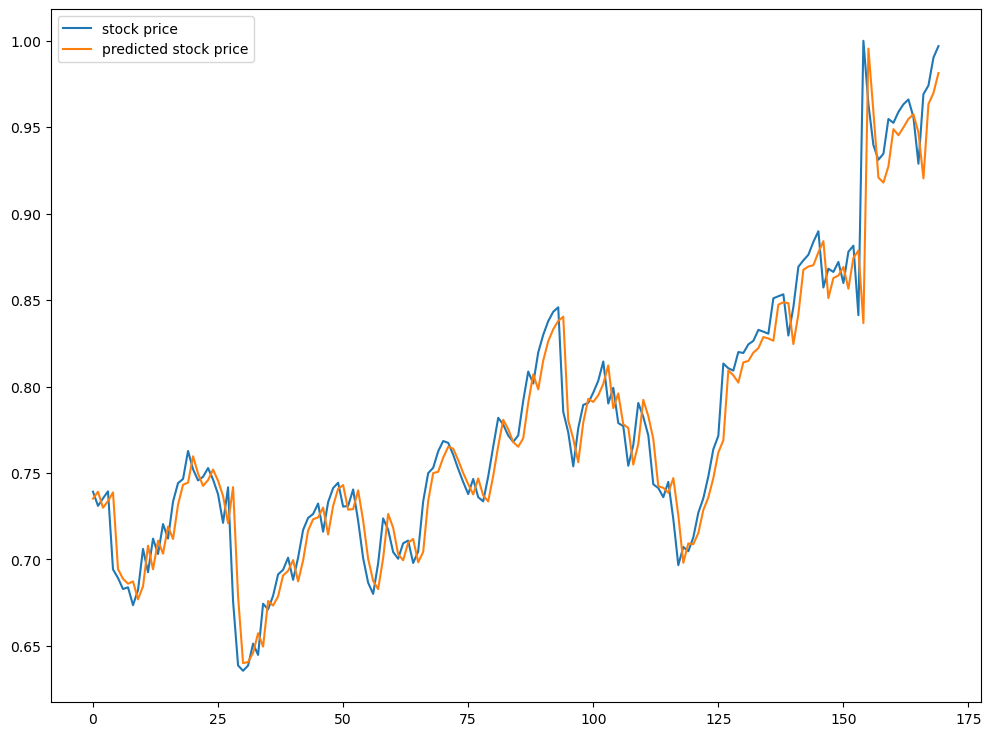

In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM

google = fdr.DataReader('GOOG', '2016')

openValues = google[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]


def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)


inputs = Input(shape=(X_train.shape[1], 1))
lstm_out = LSTM(16, activation='tanh', return_sequences=False)(inputs)
outputs = Dense(1)(lstm_out)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [2]:
import music21
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import tensorflow as tf
import numpy as np

# "작은 별", "봄나들이", "나비야 나비야" 악보를 ABC 표기로 표현
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"
hw9 = 'tinyNotation: 4/4 c4 d2 e4 f4 g4 a4 b4 c4'
# 계이름과 숫자를 상호 변환하는 표
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
    notes=s.split(' ')[2:]
    seq=[]
    for i in notes:
        seq.append([note2num[i[0]],int(i[1])])
    return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 레이블을 원핫 코드로 변환
def to_onehot(l):
    t=[]
    for i in range(len(l)):
        a=np.zeros(len(onehot))
        a[onehot.index(list(l[i]))]=1.0
        t.append(a)
    return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [3]:
w=8 # 윈도우 크기
h=1 # 수평선 계수

# 세 곡을 시계열로 변환하고 결합
seq1=abc2timeseries(little_star)
seq2=abc2timeseries(butterfly)
seq3=abc2timeseries(spring_picnic)
seq4 =abc2timeseries(hw9)
seq=seq1+seq2+seq3+seq4

X,Y = seq2dataset(seq,w,h)
# 훈련 집합 구축
split=int(len(X)*1.0) # 100%를 훈련집합으로 사용
x_train=X[0:split]; y_train=Y[0:split]
y_train=to_onehot(y_train)

In [4]:
# LSTM 모델 설계와 학습
inputs = Input(shape=x_train[0].shape)
lstm_out = LSTM(units=128, activation='relu')(inputs)
outputs = Dense(y_train.shape[1], activation='softmax')(lstm_out)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
124/124 - 2s - 12ms/step - accuracy: 0.1694 - loss: 2.6807
Epoch 2/200
124/124 - 0s - 2ms/step - accuracy: 0.2419 - loss: 2.4404
Epoch 3/200
124/124 - 0s - 3ms/step - accuracy: 0.2339 - loss: 2.3554
Epoch 4/200
124/124 - 0s - 3ms/step - accuracy: 0.2823 - loss: 2.2513
Epoch 5/200
124/124 - 0s - 3ms/step - accuracy: 0.2742 - loss: 2.2209
Epoch 6/200
124/124 - 1s - 4ms/step - accuracy: 0.3065 - loss: 2.1923
Epoch 7/200
124/124 - 0s - 2ms/step - accuracy: 0.2742 - loss: 2.1968
Epoch 8/200
124/124 - 0s - 4ms/step - accuracy: 0.3145 - loss: 2.1251
Epoch 9/200
124/124 - 0s - 4ms/step - accuracy: 0.2742 - loss: 2.1150
Epoch 10/200
124/124 - 0s - 2ms/step - accuracy: 0.2742 - loss: 2.0879
Epoch 11/200
124/124 - 0s - 3ms/step - accuracy: 0.3387 - loss: 2.0086
Epoch 12/200
124/124 - 0s - 4ms/step - accuracy: 0.3387 - loss: 2.0012
Epoch 13/200
124/124 - 0s - 2ms/step - accuracy: 0.3226 - loss: 1.9422
Epoch 14/200
124/124 - 0s - 3ms/step - accuracy: 0.3387 - loss: 1.8507
Epoch 15/200
1

In [8]:
# 학습된 모델로 편곡을 하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)
    return timeseries2abc(music)
new_song=arranging_music(model,x_train[0],50)
print(new_song)
music21.converter.parse(new_song).show('midi')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━